<a href="https://colab.research.google.com/github/longhtt/Education/blob/main/DATA_3320_Education_Inequality_Data_Preparation_Long_Tran_Thien.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction

Provide a brief introduction to the purpose of this notebook.

## Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')
import missingno as msno

# Train-test splits
from sklearn.model_selection import train_test_split

# Model preprocessing
from sklearn.preprocessing import StandardScaler

# Imputation
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer

# Import pandas, numpy, and matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# seaborn is a data visualization library built on matplotlib
import seaborn as sns 
# set the plotting style 
sns.set_style("whitegrid")

# Model preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

# Train-test splits
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, RandomizedSearchCV

# Models
from sklearn import linear_model


# Model metrics and analysis
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

## The data

This project utilizes two data sets. The primary data set is the EdGap data set from [EdGap.org](https://www.edgap.org/#5/37.875/-96.987). This data set from 2016 includes information about average ACT or SAT scores for schools and several socioeconomic characteristics of the school district. The secondary data set is basic information about each school from the [National Center for Education Statistics](https://nces.ed.gov/ccd/pubschuniv.asp).





### EdGap data

All socioeconomic data (household income, unemployment, adult educational attainment, and family structure) are from the Census Bureau's American Community Survey. 

[EdGap.org](https://www.edgap.org/#5/37.875/-96.987) report that ACT and SAT score data is from each state's department of education or some other public data release. The nature of the other public data release is not known.

The quality of the census data and the department of education data can be assumed to be reasonably high. 

[EdGap.org](https://www.edgap.org/#5/37.875/-96.987) do not indicate that they processed the data in any way. The data were assembled by the [EdGap.org](https://www.edgap.org/#5/37.875/-96.987) team, so there is always the possibility for human error. Given the public nature of the data, we would be able to consult the original data sources to check the quality of the data if we had any questions.

### School information data

The school information data is from the [National Center for Education Statistics](https://nces.ed.gov/ccd/pubschuniv.asp). This data set consists of basic identifying information about schools and can be assumed to be of reasonably high quality. As for the EdGap.org data, the school information data is public, so we would be able to consult the original data sources to check the quality of the data if we had any questions.


## Load the data

Load the EdGap
 data set

In [ ]:
edgap = pd.read_excel('https://raw.githubusercontent.com/brian-fischer/DATA-3320/main/education/EdGap_data.xlsx')

/usr/local/lib/python3.9/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


Load the school information data

In [ ]:
!wget https://www.dropbox.com/s/lkl5nvcdmwyoban/ccd_sch_029_1617_w_1a_11212017.csv?dl=0

--2023-04-21 21:06:32--  https://www.dropbox.com/s/lkl5nvcdmwyoban/ccd_sch_029_1617_w_1a_11212017.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6030:18::a27d:5012
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/lkl5nvcdmwyoban/ccd_sch_029_1617_w_1a_11212017.csv [following]
--2023-04-21 21:06:33--  https://www.dropbox.com/s/raw/lkl5nvcdmwyoban/ccd_sch_029_1617_w_1a_11212017.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc5503607dbcc7c7b1f47035fae7.dl.dropboxusercontent.com/cd/0/inline/B6mvOHku8oVfn8Ybbwgx12a-f3AkE3YJALiQTmJfJwHHBxqIKM4Ms0TaT1Qcg_J1FY7IKqHb4OM3JxdO_GC32KuxRewglruFpzS-DQLNJvbbkBX9o1YjQjyEEKtGKDVC5FjhfMf9gimQkhz_8VNVKpRoF4mADSNzjOi1QCxmRRe3jQ/file# [following]
--2023-04-21 21:06:33--  https://uc5503607dbcc7c7b1f47035fae7.dl.dropboxusercontent.com/cd/0/inline/B6mvOHku

In [ ]:
school_info = pd.read_csv('ccd_sch_029_1617_w_1a_11212017.csv?dl=0', encoding='unicode_escape')

<ipython-input-4-da1a7837c049>:1: DtypeWarning: Columns (6,9,14,15,18,19,21,22,25,26,29,31,35,39,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  school_info = pd.read_csv('ccd_sch_029_1617_w_1a_11212017.csv?dl=0', encoding='unicode_escape')


## Explore the contents of the data sets

In [ ]:
edgap

,NCESSCH School ID,CT Unemployment Rate,CT Pct Adults with College Degree,CT Pct Childre In Married Couple Family,CT Median Household Income,School ACT average (or equivalent if SAT score),School Pct Free and Reduced Lunch
0,100001600143,0.117962,0.445283,0.346495,42820.0,20.433455,0.066901
1,100008000024,0.063984,0.662765,0.767619,89320.0,19.498168,0.112412
2,100008000225,0.056460,0.701864,0.713090,84140.0,19.554335,0.096816
3,100017000029,0.044739,0.692062,0.641283,56500.0,17.737485,0.296960
4,100018000040,0.077014,0.640060,0.834402,54015.0,18.245421,0.262641
...,...,...,...,...,...,...,...
7981,560530200294,0.034549,0.590780,0.720077,64891.0,18.500000,0.232156
7982,560569000311,0.069538,0.633860,0.808841,44603.0,22.300000,0.083871
7983,560569500360,0.035159,0.764566,0.776570,44896.0,21.500000,0.184829
7984,560576200324,0.063877,0.670532,0.879324,92134.0,19.700000,0.112583


In [ ]:
school_info

,SCHOOL_YEAR,FIPST,STATENAME,ST,SCH_NAME,LEA_NAME,STATE_AGENCY_NO,UNION,ST_LEAID,LEAID,...,G_10_OFFERED,G_11_OFFERED,G_12_OFFERED,G_13_OFFERED,G_UG_OFFERED,G_AE_OFFERED,GSLO,GSHI,LEVEL,IGOFFERED
0,2016-2017,1,ALABAMA,AL,Sequoyah Sch - Chalkville Campus,Alabama Youth Services,1,NaN,AL-210,100002,...,Yes,Yes,Yes,No,No,No,07,12,High,As reported
1,2016-2017,1,ALABAMA,AL,Camps,Alabama Youth Services,1,NaN,AL-210,100002,...,Yes,Yes,Yes,No,No,No,07,12,High,As reported
2,2016-2017,1,ALABAMA,AL,Det Ctr,Alabama Youth Services,1,NaN,AL-210,100002,...,Yes,Yes,Yes,No,No,No,07,12,High,As reported
3,2016-2017,1,ALABAMA,AL,Wallace Sch - Mt Meigs Campus,Alabama Youth Services,1,NaN,AL-210,100002,...,Yes,Yes,Yes,No,No,No,07,12,High,As reported
4,2016-2017,1,ALABAMA,AL,McNeel Sch - Vacca Campus,Alabama Youth Services,1,NaN,AL-210,100002,...,Yes,Yes,Yes,No,No,No,07,12,High,As reported
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102178,2016-2017,78,U.S. VIRGIN ISLANDS,VI,GLADYS A. ABRAHAM ELEMENTARY SCHOOL,Saint Thomas - Saint John School District,1,NaN,VI-001,7800030,...,No,No,No,No,No,No,KG,06,Elementary,As reported
102179,2016-2017,78,U.S. VIRGIN ISLANDS,VI,ULLA F MULLER ELEMENTARY SCHOOL,Saint Thomas - Saint John School District,1,NaN,VI-001,7800030,...,No,No,No,No,No,No,KG,06,Elementary,As reported
102180,2016-2017,78,U.S. VIRGIN ISLANDS,VI,YVONNE BOWSKY ELEMENTARY SCHOOL,Saint Thomas - Saint John School District,1,NaN,VI-001,7800030,...,No,No,No,No,No,No,KG,06,Elementary,As reported
102181,2016-2017,78,U.S. VIRGIN ISLANDS,VI,CANCRYN JUNIOR HIGH SCHOOL,Saint Thomas - Saint John School District,1,NaN,VI-001,7800030,...,No,No,No,No,No,No,07,08,Middle,As reported


## Rename columns

In [ ]:
edgap = edgap.rename(columns={"NCESSCH School ID":"id", 
              "CT Pct Adults with College Degree":"percent_college",        
              "CT Unemployment Rate":"rate_unemployment", 
              "CT Pct Childre In Married Couple Family":"percent_married",
              "CT Median Household Income":"median_income",
              "School ACT average (or equivalent if SAT score)":"average_act",
              "School Pct Free and Reduced Lunch":"percent_lunch"})
edgap

,id,rate_unemployment,percent_college,percent_married,median_income,average_act,percent_lunch
0,100001600143,0.117962,0.445283,0.346495,42820.0,20.433455,0.066901
1,100008000024,0.063984,0.662765,0.767619,89320.0,19.498168,0.112412
2,100008000225,0.056460,0.701864,0.713090,84140.0,19.554335,0.096816
3,100017000029,0.044739,0.692062,0.641283,56500.0,17.737485,0.296960
4,100018000040,0.077014,0.640060,0.834402,54015.0,18.245421,0.262641
...,...,...,...,...,...,...,...
7981,560530200294,0.034549,0.590780,0.720077,64891.0,18.500000,0.232156
7982,560569000311,0.069538,0.633860,0.808841,44603.0,22.300000,0.083871
7983,560569500360,0.035159,0.764566,0.776570,44896.0,21.500000,0.184829
7984,560576200324,0.063877,0.670532,0.879324,92134.0,19.700000,0.112583


Rename the columns `SCHOOL_YEAR`, `NCESSCH`, `MSTATE`, `MZIP`, `SCH_TYPE_TEXT`, `LEVEL` to `year`, `id`, `state`, `zip_code`, `school_type`, `school_level`

In [ ]:
school_info = school_info.rename(columns={'SCHOOL_YEAR':'year', 
                                 'NCESSCH':'id',
                                 'MSTATE':'state',
                                 'MZIP':'zip_code',
                                 'SCH_TYPE_TEXT':'school_type',
                                 'LEVEL':'school_level'})
school_info

,year,FIPST,STATENAME,ST,SCH_NAME,LEA_NAME,STATE_AGENCY_NO,UNION,ST_LEAID,LEAID,...,G_10_OFFERED,G_11_OFFERED,G_12_OFFERED,G_13_OFFERED,G_UG_OFFERED,G_AE_OFFERED,GSLO,GSHI,school_level,IGOFFERED
0,2016-2017,1,ALABAMA,AL,Sequoyah Sch - Chalkville Campus,Alabama Youth Services,1,NaN,AL-210,100002,...,Yes,Yes,Yes,No,No,No,07,12,High,As reported
1,2016-2017,1,ALABAMA,AL,Camps,Alabama Youth Services,1,NaN,AL-210,100002,...,Yes,Yes,Yes,No,No,No,07,12,High,As reported
2,2016-2017,1,ALABAMA,AL,Det Ctr,Alabama Youth Services,1,NaN,AL-210,100002,...,Yes,Yes,Yes,No,No,No,07,12,High,As reported
3,2016-2017,1,ALABAMA,AL,Wallace Sch - Mt Meigs Campus,Alabama Youth Services,1,NaN,AL-210,100002,...,Yes,Yes,Yes,No,No,No,07,12,High,As reported
4,2016-2017,1,ALABAMA,AL,McNeel Sch - Vacca Campus,Alabama Youth Services,1,NaN,AL-210,100002,...,Yes,Yes,Yes,No,No,No,07,12,High,As reported
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102178,2016-2017,78,U.S. VIRGIN ISLANDS,VI,GLADYS A. ABRAHAM ELEMENTARY SCHOOL,Saint Thomas - Saint John School District,1,NaN,VI-001,7800030,...,No,No,No,No,No,No,KG,06,Elementary,As reported
102179,2016-2017,78,U.S. VIRGIN ISLANDS,VI,ULLA F MULLER ELEMENTARY SCHOOL,Saint Thomas - Saint John School District,1,NaN,VI-001,7800030,...,No,No,No,No,No,No,KG,06,Elementary,As reported
102180,2016-2017,78,U.S. VIRGIN ISLANDS,VI,YVONNE BOWSKY ELEMENTARY SCHOOL,Saint Thomas - Saint John School District,1,NaN,VI-001,7800030,...,No,No,No,No,No,No,KG,06,Elementary,As reported
102181,2016-2017,78,U.S. VIRGIN ISLANDS,VI,CANCRYN JUNIOR HIGH SCHOOL,Saint Thomas - Saint John School District,1,NaN,VI-001,7800030,...,No,No,No,No,No,No,07,08,Middle,As reported


## Convert data types, if necessary

In [ ]:
school_info.id

0         1.000020e+10
1         1.000020e+10
2         1.000020e+10
3         1.000020e+10
4         1.000020e+10
              ...     
102178    7.800030e+11
102179    7.800030e+11
102180    7.800030e+11
102181    7.800030e+11
102182    7.800030e+11
Name: id, Length: 102183, dtype: float64

In [ ]:
school_info = school_info.dropna(subset='id')

In [ ]:
school_info['id'].astype('int64')

0          10000200277
1          10000201667
2          10000201670
3          10000201705
4          10000201706
              ...     
102178    780003000025
102179    780003000026
102180    780003000027
102181    780003000033
102182    780003000034
Name: id, Length: 102181, dtype: int64

In [ ]:
school_info = school_info[{'year', 'id', 'state', 'zip_code', 'school_type', 'school_level'}]
school_info

<ipython-input-12-f37ac9cb7093>:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  school_info = school_info[{'year', 'id', 'state', 'zip_code', 'school_type', 'school_level'}]


,school_type,school_level,zip_code,state,id,year
0,Alternative School,High,35220,AL,1.000020e+10,2016-2017
1,Alternative School,High,36057,AL,1.000020e+10,2016-2017
2,Alternative School,High,36057,AL,1.000020e+10,2016-2017
3,Alternative School,High,36057,AL,1.000020e+10,2016-2017
4,Alternative School,High,35206,AL,1.000020e+10,2016-2017
...,...,...,...,...,...,...
102178,Regular School,Elementary,802,VI,7.800030e+11,2016-2017
102179,Regular School,Elementary,802,VI,7.800030e+11,2016-2017
102180,Regular School,Elementary,802,VI,7.800030e+11,2016-2017
102181,Regular School,Middle,802,VI,7.800030e+11,2016-2017


In [ ]:
edgap

,id,rate_unemployment,percent_college,percent_married,median_income,average_act,percent_lunch
0,100001600143,0.117962,0.445283,0.346495,42820.0,20.433455,0.066901
1,100008000024,0.063984,0.662765,0.767619,89320.0,19.498168,0.112412
2,100008000225,0.056460,0.701864,0.713090,84140.0,19.554335,0.096816
3,100017000029,0.044739,0.692062,0.641283,56500.0,17.737485,0.296960
4,100018000040,0.077014,0.640060,0.834402,54015.0,18.245421,0.262641
...,...,...,...,...,...,...,...
7981,560530200294,0.034549,0.590780,0.720077,64891.0,18.500000,0.232156
7982,560569000311,0.069538,0.633860,0.808841,44603.0,22.300000,0.083871
7983,560569500360,0.035159,0.764566,0.776570,44896.0,21.500000,0.184829
7984,560576200324,0.063877,0.670532,0.879324,92134.0,19.700000,0.112583


## Are the data suitable for answering the question?

We want to perform quick exploratory data analysis to determine whether the data are sufficient to answer our question. If the data are not sufficient, we do not want to waste time doing anything that will not be productive.

## Select relevant subsets of the data

The school information data set contains a lot of information. We only need the year, school identity, location, and school type information.

Keep the columns `SCHOOL_YEAR`, `NCESSCH`, `MSTATE`, `MZIP`, `SCH_TYPE_TEXT`, `LEVEL`

## Join data frames 

In [ ]:
df_merge = edgap.merge(school_info, on = 'id', how = 'left')
df_merge

,id,rate_unemployment,percent_college,percent_married,median_income,average_act,percent_lunch,school_type,school_level,zip_code,state,year
0,100001600143,0.117962,0.445283,0.346495,42820.0,20.433455,0.066901,Regular School,High,19804,DE,2016-2017
1,100008000024,0.063984,0.662765,0.767619,89320.0,19.498168,0.112412,Regular School,High,19709,DE,2016-2017
2,100008000225,0.056460,0.701864,0.713090,84140.0,19.554335,0.096816,Regular School,High,19709,DE,2016-2017
3,100017000029,0.044739,0.692062,0.641283,56500.0,17.737485,0.296960,Regular School,High,19958,DE,2016-2017
4,100018000040,0.077014,0.640060,0.834402,54015.0,18.245421,0.262641,Regular School,High,19934,DE,2016-2017
...,...,...,...,...,...,...,...,...,...,...,...,...
7981,560530200294,0.034549,0.590780,0.720077,64891.0,18.500000,0.232156,Regular School,High,82902,WY,2016-2017
7982,560569000311,0.069538,0.633860,0.808841,44603.0,22.300000,0.083871,Regular School,High,82833,WY,2016-2017
7983,560569500360,0.035159,0.764566,0.776570,44896.0,21.500000,0.184829,Regular School,High,82801,WY,2016-2017
7984,560576200324,0.063877,0.670532,0.879324,92134.0,19.700000,0.112583,Regular School,High,82935,WY,2016-2017


<Axes: >

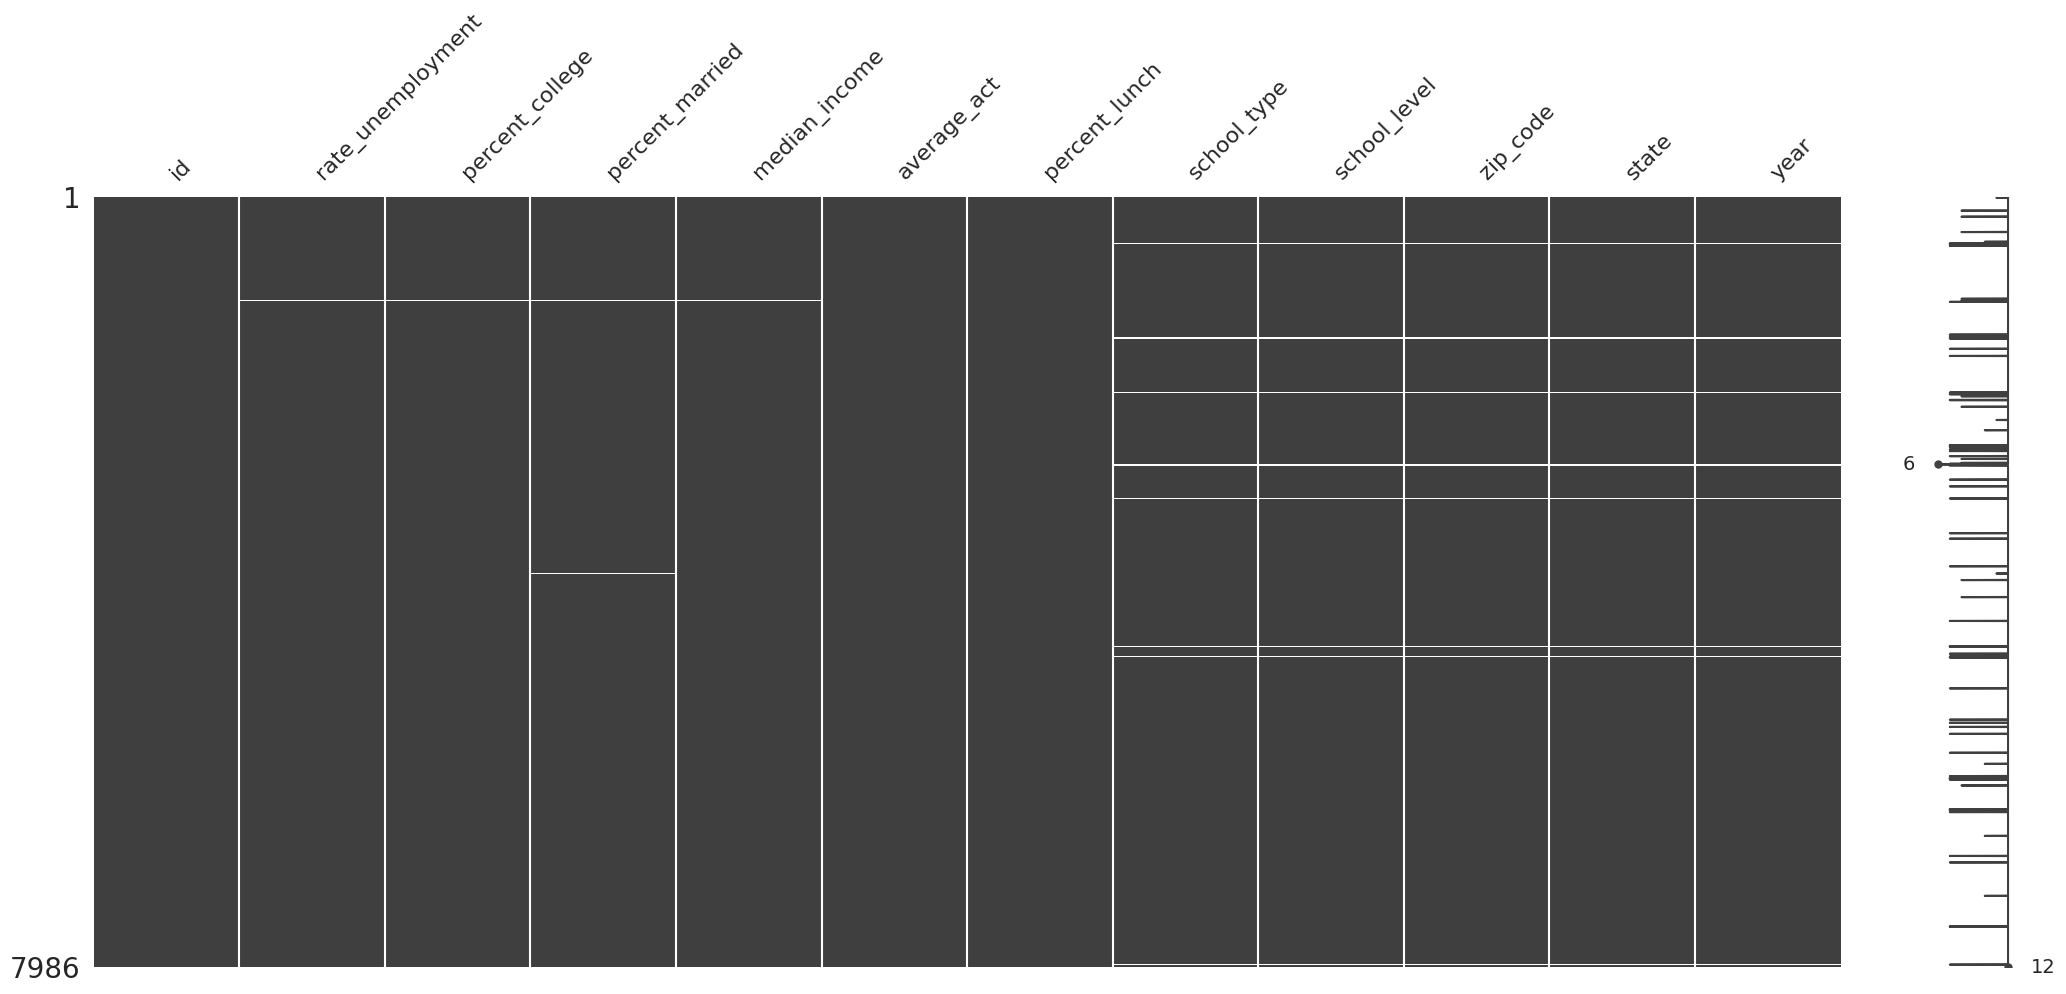

In [ ]:
msno.matrix(df_merge)

## Quality Control

Check for out-of-range values or values that do not match what we want to analyze. Either set values to `NaN` or remove the observations, as appropriate.

there are incorrect data in median_income(maybe), average_act, percent_lunch <br/>
for the average_act, we want to drop them since we are trying to predict act

In [ ]:
df_merge['school_type'].value_counts()

Regular School                 7885
Alternative School               10
Special Education School          2
Career and Technical School       1
Name: school_type, dtype: int64

In [ ]:
df_merge['school_level'].value_counts()

High            7230
Other            631
Not reported      35
Elementary         2
Name: school_level, dtype: int64

keeping only 'high' schools

In [ ]:
df = df_merge.loc[df_merge['school_level'] == 'High']

<Axes: >

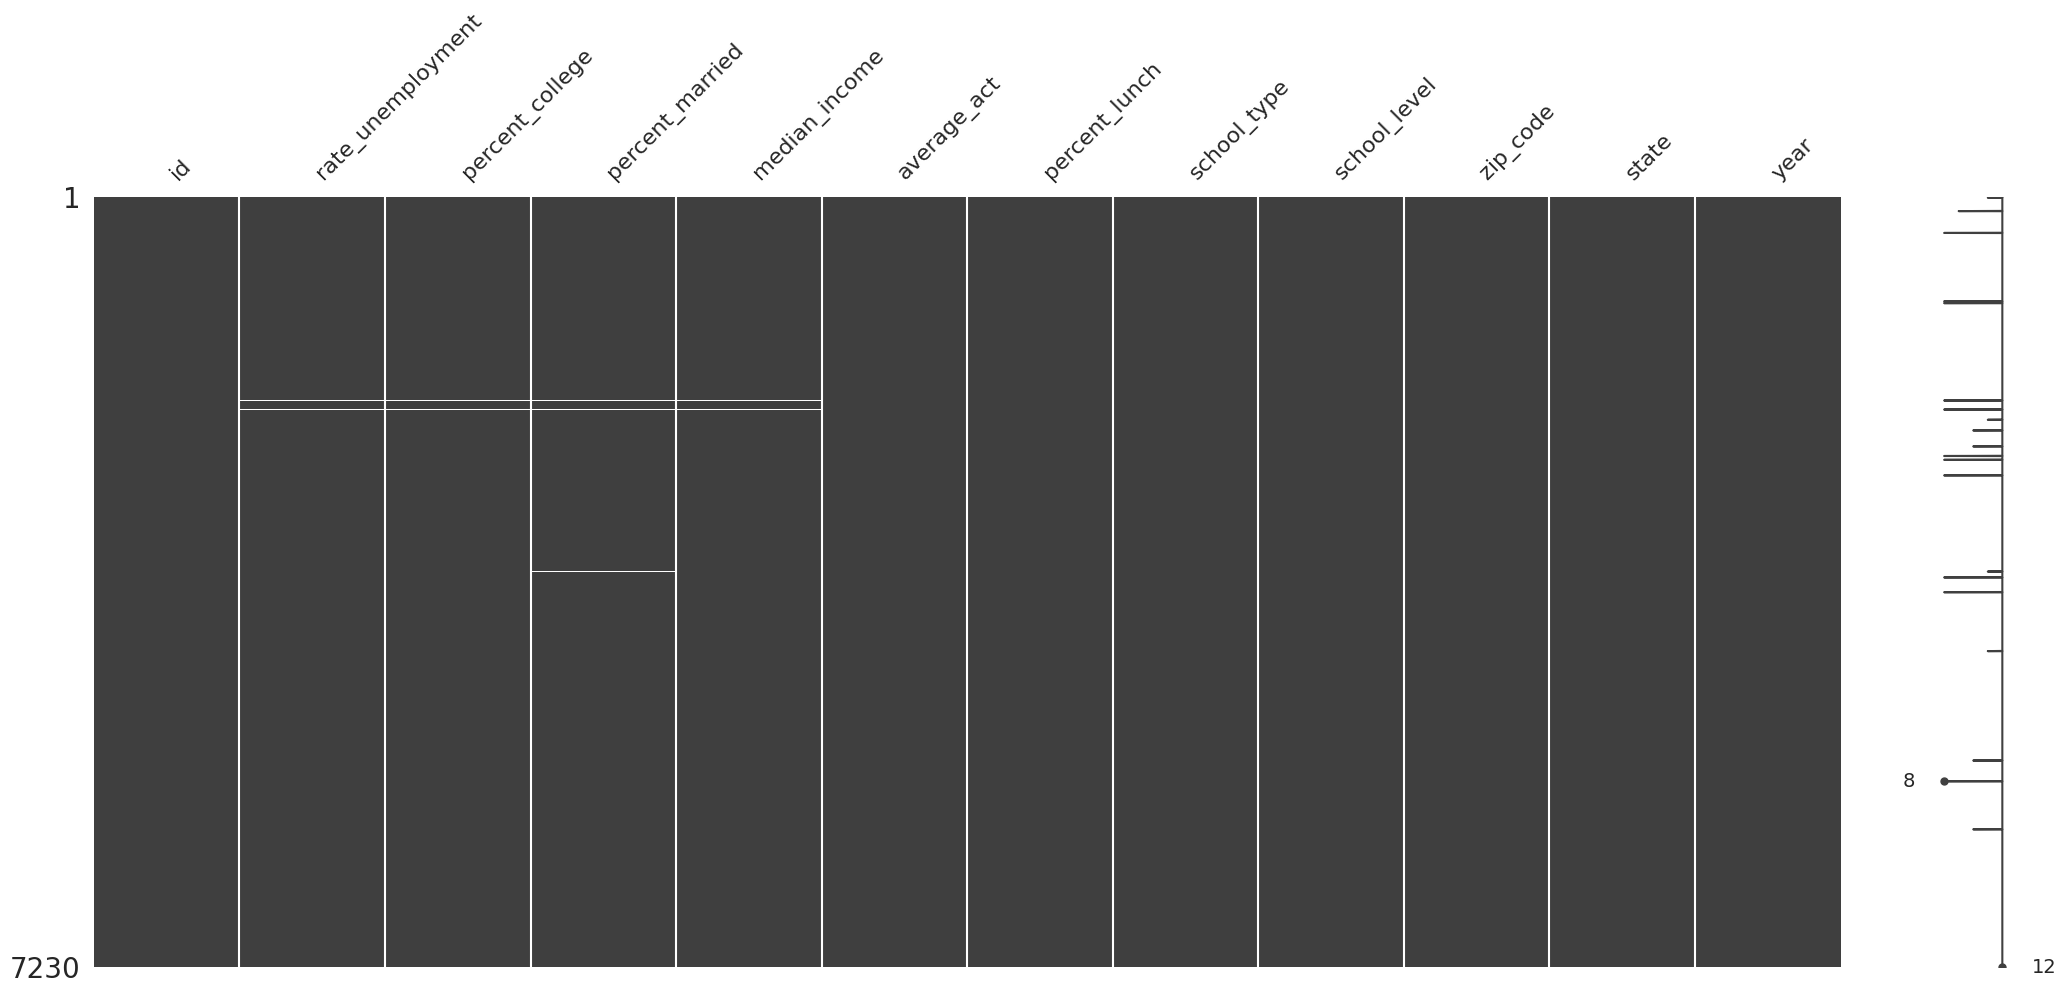

In [ ]:
msno.matrix(df)

In [ ]:
df.isna().sum()

id                    0
rate_unemployment    12
percent_college      11
percent_married      20
median_income        16
average_act           0
percent_lunch         0
school_type           0
school_level          0
zip_code              0
state                 0
year                  0
dtype: int64

ACT 1-36 only <br/>
income positive numbers only<br/>
percentage = 0-100 only

In [ ]:
df.agg(['min','max']).round(2)

<ipython-input-21-0a3445f9e44c>:1: FutureWarning: ['zip_code'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.agg(['min','max']).round(2)


,id,rate_unemployment,percent_college,percent_married,median_income,average_act,percent_lunch,school_type,school_level,state,year
min,100001600143,0.00,0.09,0.0,4833.0,-3.07,-0.05,Alternative School,High,DE,2016-2017
max,560583000335,0.59,1.00,1.0,226181.0,32.36,1.00,Special Education School,High,WY,2016-2017


In [ ]:
df = df.loc[df['average_act'] >= 1]

droping below_one_act from df_merge

In [ ]:
below_one_act = np.where(df['average_act'] < 1)[0]

In [ ]:
percent_lunch_under_Zero = np.where(df_merge['percent_lunch'] < 0)[0]
percent_lunch_under_Zero

array([1398, 1422, 2336, 2514, 2718, 3277, 3519, 4366, 4413, 4536, 4537,
       4608, 4898, 4948, 5239, 5365, 5435, 5871, 6234, 6260])

<Axes: >

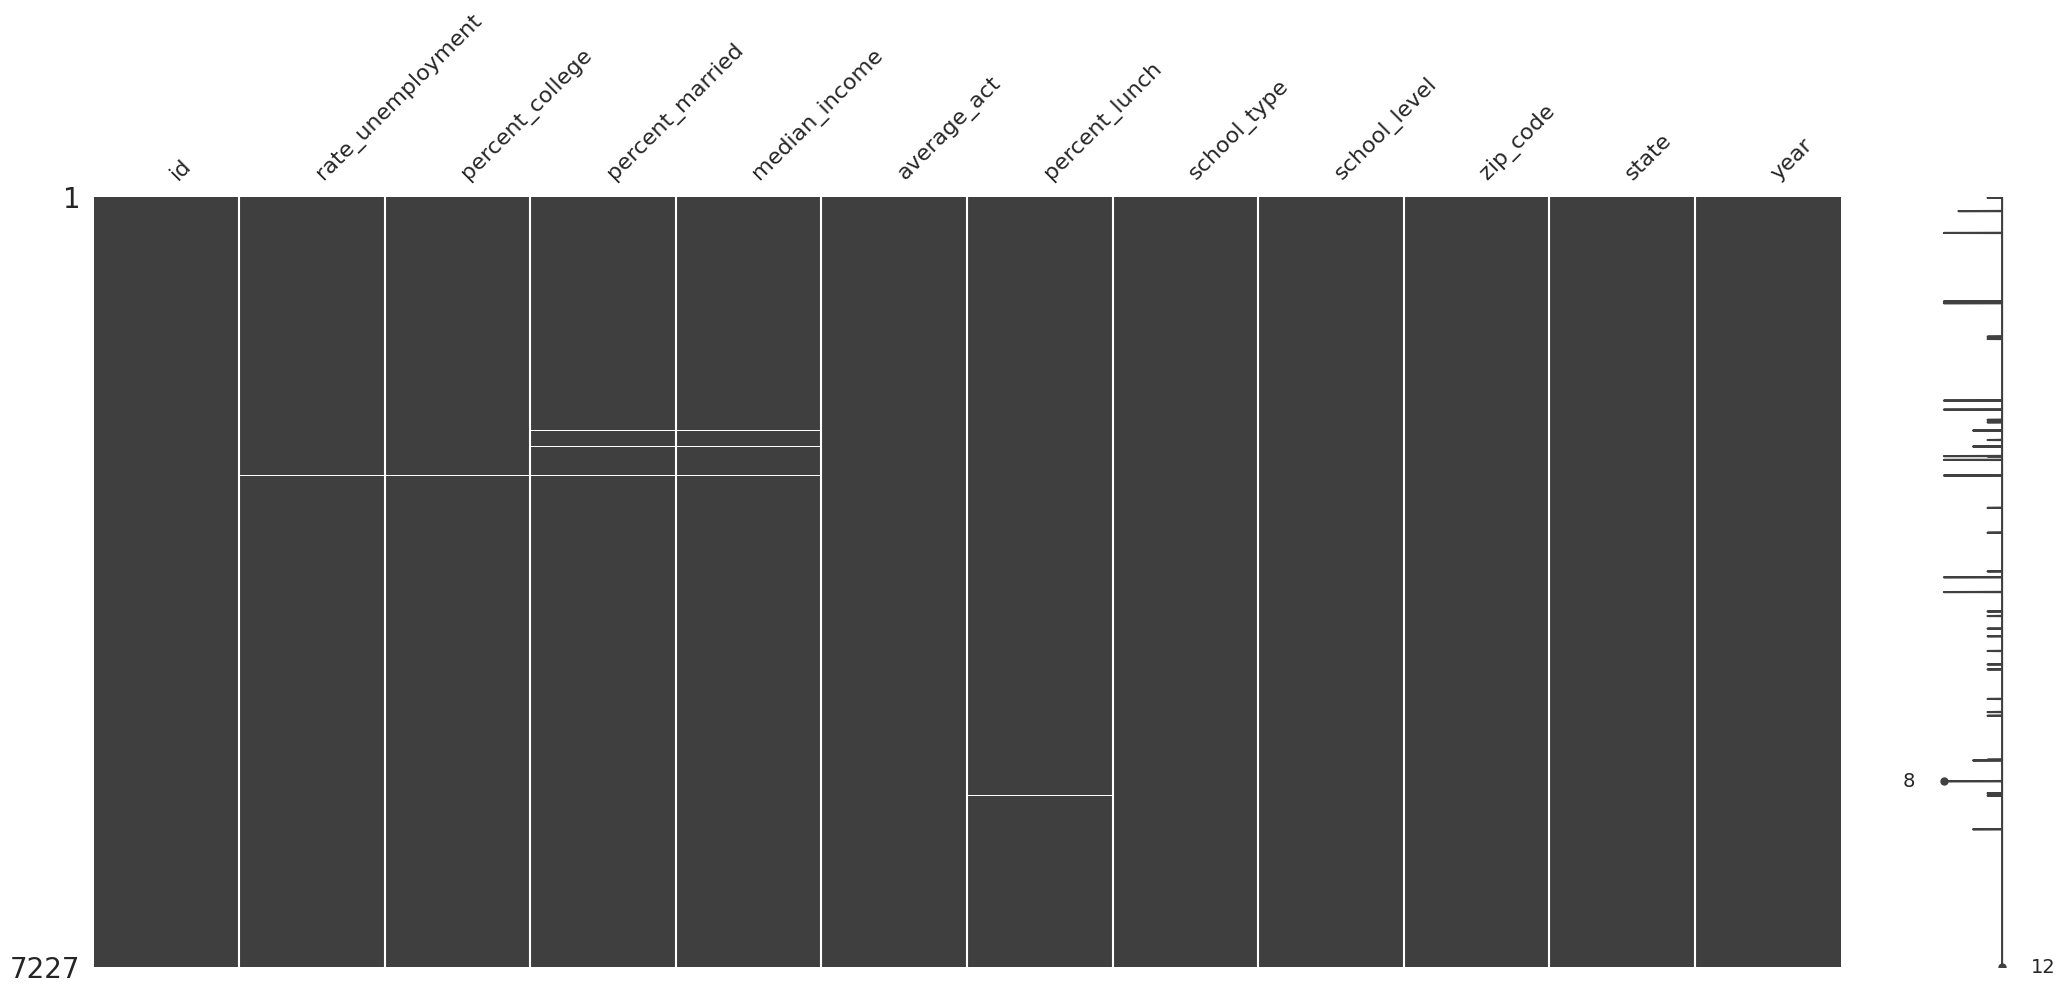

In [ ]:
for _, index in enumerate(percent_lunch_under_Zero):
  df.loc[index, 'percent_lunch'] = np.nan
msno.matrix(df)

In [ ]:
df.agg(['min','max']).round(2)

<ipython-input-26-0a3445f9e44c>:1: FutureWarning: ['zip_code'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.agg(['min','max']).round(2)


,id,rate_unemployment,percent_college,percent_married,median_income,average_act,percent_lunch,school_type,school_level,state,year
min,100001600143,0.00,0.09,0.0,4833.0,12.36,0.0,Alternative School,High,DE,2016-2017
max,560583000335,0.59,1.00,1.0,226181.0,32.36,1.0,Special Education School,High,WY,2016-2017


In [ ]:
df.isna().sum()

id                    0
rate_unemployment    12
percent_college      11
percent_married      20
median_income        16
average_act           0
percent_lunch        20
school_type           0
school_level          0
zip_code              0
state                 0
year                  0
dtype: int64

## Identify missing values

Determine whether there are missing values in the data set. Only identify them at this point; we will deal with them after creating training and testing splits of the data set.

## Train test split

We will use the test set approach to compare models predicting `average_act`. 

![](https://upload.wikimedia.org/wikipedia/commons/thumb/b/bb/ML_dataset_training_validation_test_sets.png/800px-ML_dataset_training_validation_test_sets.png)

Split the data into training and testing sets. Keep 20% of the data for the test set.

In [ ]:
df.head(1)

,id,rate_unemployment,percent_college,percent_married,median_income,average_act,percent_lunch,school_type,school_level,zip_code,state,year
0,100001600143,0.117962,0.445283,0.346495,42820.0,20.433455,0.066901,Regular School,High,19804,DE,2016-2017


In [ ]:
x = df[df.columns.difference(['id', 'average_act'])]
y = df['average_act']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state = 1)
print(X_train.shape, X_test.shape)

(5781, 10) (1446, 10)


In [ ]:
X_train.agg(['mean','std']).round(2)

<ipython-input-33-288b8c217e1f>:1: FutureWarning: ['school_level', 'school_type', 'state', 'year', 'zip_code'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  X_train.agg(['mean','std']).round(2)


,median_income,percent_college,percent_lunch,percent_married,rate_unemployment
mean,53170.26,0.57,0.41,0.64,0.10
std,24827.94,0.17,0.23,0.19,0.06


In [ ]:
X_test.agg(['mean','std']).round(2)

<ipython-input-34-247411c871de>:1: FutureWarning: ['school_level', 'school_type', 'state', 'year', 'zip_code'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  X_test.agg(['mean','std']).round(2)


,median_income,percent_college,percent_lunch,percent_married,rate_unemployment
mean,51179.23,0.57,0.42,0.63,0.10
std,22358.47,0.16,0.24,0.19,0.06


In [ ]:
imputer = IterativeImputer()

In [ ]:
imputer.fit(X_train.loc[:,'median_income':'rate_unemployment'])

IterativeImputer()

In [ ]:
X_train.loc[:, 'median_income':'rate_unemployment'] = imputer.transform(X_train.loc[:,'median_income':'rate_unemployment'])

In [ ]:
X_train.isna().sum()

median_income        0
percent_college      0
percent_lunch        0
percent_married      0
rate_unemployment    0
school_level         0
school_type          0
state                0
year                 0
zip_code             0
dtype: int64

In [ ]:
X_test.isna().sum()

median_income        1
percent_college      0
percent_lunch        3
percent_married      2
rate_unemployment    0
school_level         0
school_type          0
state                0
year                 0
zip_code             0
dtype: int64

In [ ]:
X_test.loc[:,'median_income':'rate_unemployment'] = imputer.transform(X_test.loc[:,'median_income':'rate_unemployment'])

In [ ]:
X_test.isna().sum()

median_income        0
percent_college      0
percent_lunch        0
percent_married      0
rate_unemployment    0
school_level         0
school_type          0
state                0
year                 0
zip_code             0
dtype: int64

In [ ]:
df_train = X_train.join(y_train)
df_train.head()

,median_income,percent_college,percent_lunch,percent_married,rate_unemployment,school_level,school_type,state,year,zip_code,average_act
3663,41793.0,0.602419,0.542056,0.574034,0.111111,High,Regular School,NJ,2016-2017,7306,16.538462
1689,38173.0,0.469225,0.339655,0.711429,0.135246,High,Regular School,IN,2016-2017,47567,20.367521
5852,39635.0,0.567361,0.270175,0.694514,0.083419,High,Regular School,PA,2016-2017,15853,20.347985
3288,40978.0,0.467614,0.315556,0.766901,0.062531,High,Regular School,MO,2016-2017,64644,21.600000
378,36875.0,0.604470,0.548410,0.803435,0.071429,High,Regular School,FL,2016-2017,34669,21.056166


In [ ]:
df_test = X_test.join(y_test)

<Axes: >

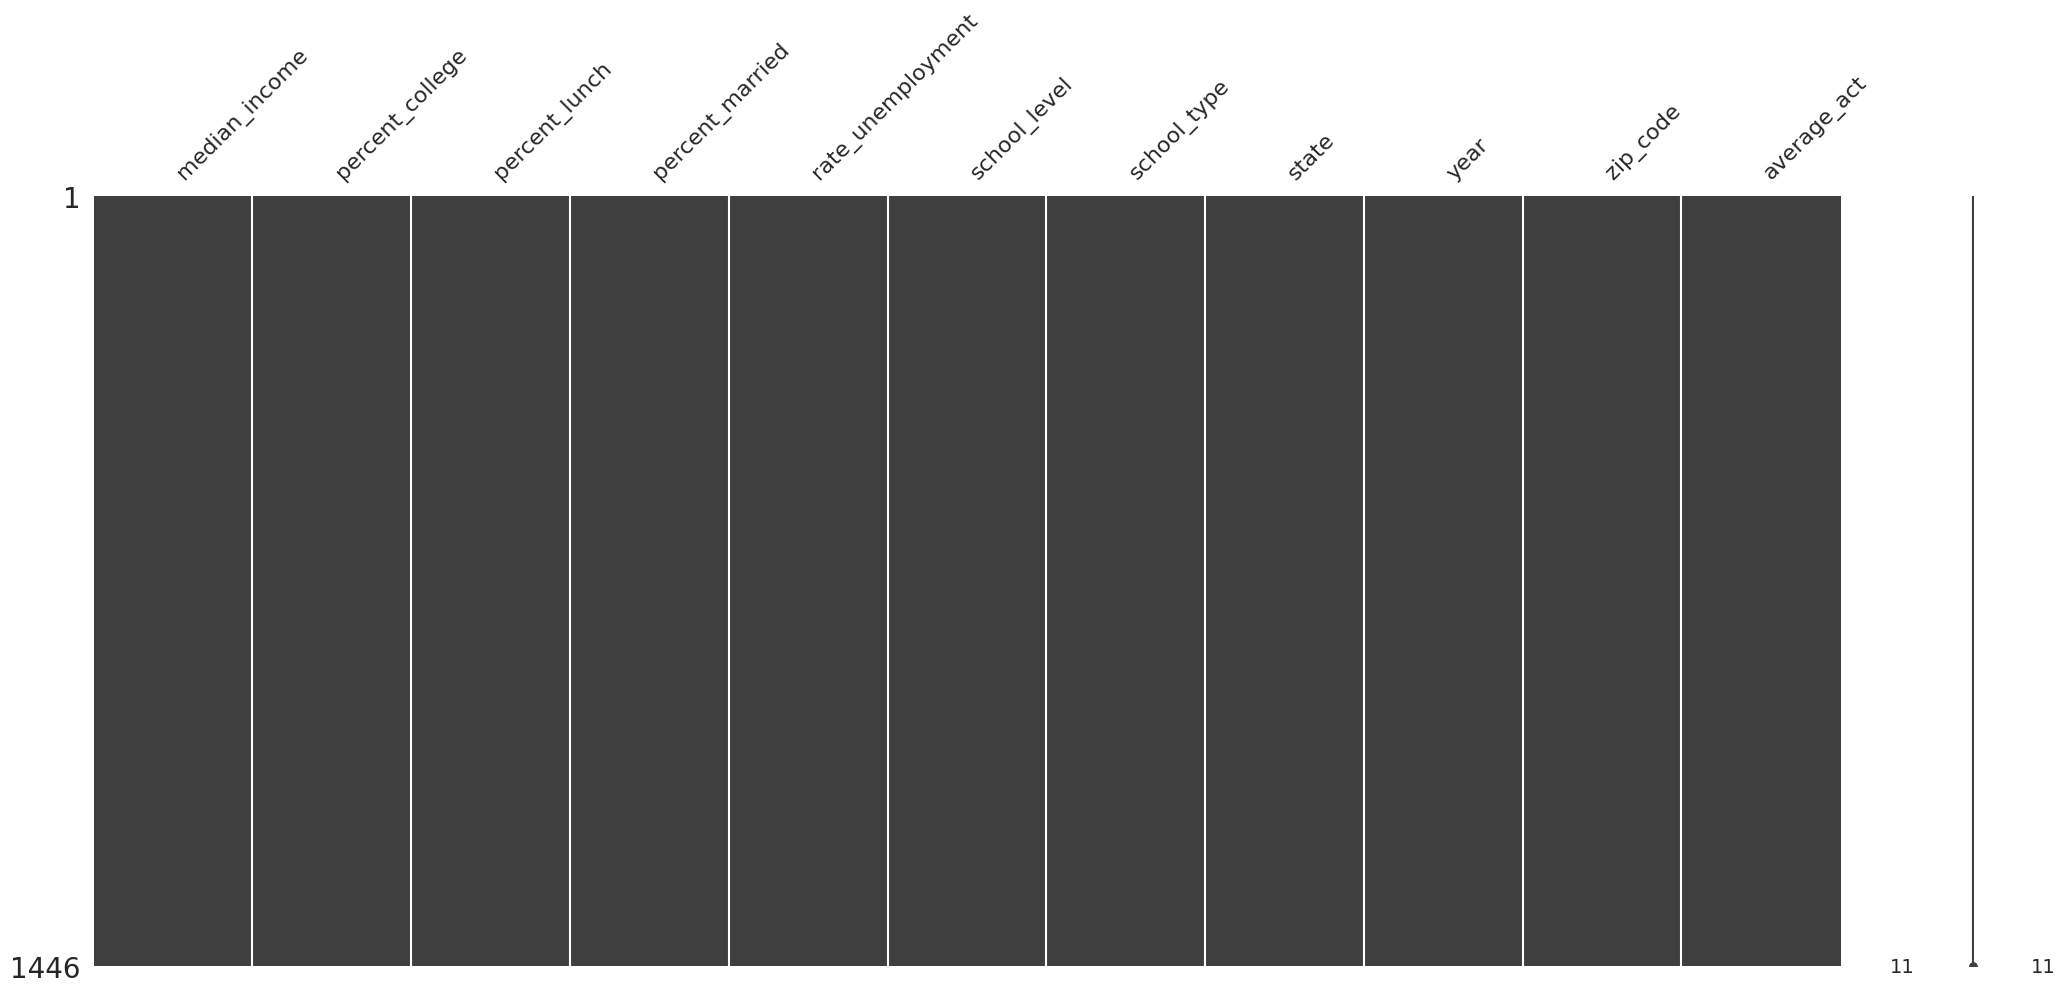

In [ ]:
msno.matrix(df_test)

## Data imputation

Use an imputation method to replace missing values in the columns corresponding to predictor variables in the analysis.

## Create relevant derived variables as new columns

We may already know that we want to process the data to create new variables from the existing variables. However, we often start analyzing the data and realize that it is useful to create new variables derived from the existing variables. Or, we might not create any new columns. It is fine to return to modify this step after exploring the data further.

## Export the clean .csv files

Export files with the training and testing data

In [ ]:
from google.colab import files

# uncomment code to export
#df_test.to_csv('clean_education_inequality_data.csv', encoding = 'utf-8-sig', index=False) 

#files.download('clean_education_inequality_data.csv')